In [ ]:
import pandas as pd
import os 
import shutil
train_data = pd.read_csv('/content/drive/My Drive/Thesis csv/Train.csv')

In [ ]:
#Used only onces for file segreation

name_list = train_data['Names'].tolist()
for each in name_list:
  if each[4] == 'M':
    dir = "/content/drive/My Drive/Train/Melign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)
  else:
    dir = "/content/drive/My Drive/Train/Benign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)

In [ ]:
#don't use again used for file segreation

import pandas as pd
import os 
import shutil
valid_data = pd.read_csv('/content/drive/My Drive/Thesis csv/Valid.csv')



In [ ]:
#don't use again used for file segreation

name_list = valid_data['Names'].tolist()
for each in name_list:
  if each[4] == 'M':
    dir = "/content/drive/My Drive/Valid/Melign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)
  else:
    dir = "/content/drive/My Drive/Valid/Benign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)

In [ ]:
#don't use again used for file segreation
test_data = pd.read_csv('/content/drive/My Drive/Thesis csv/Test_new.csv')

name_list = test_data['Names'].tolist()
for each in name_list:
  if each[4] == 'M':
    dir = "/content/drive/My Drive/Test/Melign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)
  else:
    dir = "/content/drive/My Drive/Test/Benign"
    if not os.path.exists(dir):
        os.mkdir(dir)
    shutil.copy('/content/drive/My Drive/Combined/{}'.format(each), dir)

In [ ]:
pip install tensorflow keras numpy skimage matplotlib

ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(250,250,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/Train', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 4745 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Valid', batch_size = 16, class_mode='binary', target_size=(250,250))

Found 1582 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=296,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=98,  
      verbose=1)

model.save('/content/drive/My Drive/Models/CNN.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
296/296 [==============================] - 6803s 23s/step - loss: 0.5656 - accuracy: 0.7272 - val_loss: 0.5378 - val_accuracy: 0.7781
Epoch 2/20
296/296 [==============================] - 186s 630ms/step - loss: 0.4647 - accuracy: 0.8061 - val_loss: 0.4659 - val_accuracy: 0.8017
Epoch 3/20
296/296 [==============================] - 185s 624ms/step - loss: 0.4638 - accuracy: 0.8165 - val_loss: 0.4316 - val_accuracy: 0.8380
Epoch 4/20
296/296 [==============================] - 185s 624ms/step - loss: 0.4414 - accuracy: 0.8266 - val_loss: 0.5211 - val_accuracy: 0.7628
Epoch 5/20
296/296 [==============================] - 185s 625ms/step - loss: 0.4274 - accuracy: 0.8315 - val_loss: 0.4236 - val_accuracy: 0.8329
Epoch 6/20
296/296 [==============================] - 182s 614ms/step - loss: 0.4126 - accuracy: 0.8420 - val_loss: 0.4108 - val_accuracy: 0.8355
Epoch 7/20
296/296 [=============================

In [ ]:
model.save('/content/drive/My Drive/Models/CNN.h5')

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


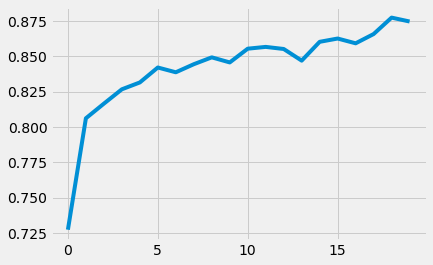

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])

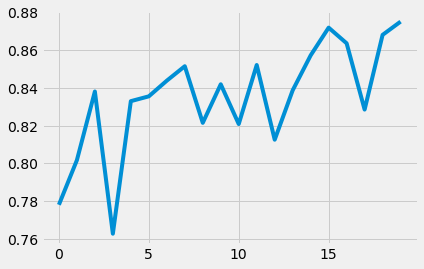

In [ ]:
plt.plot(history.history['val_accuracy'])

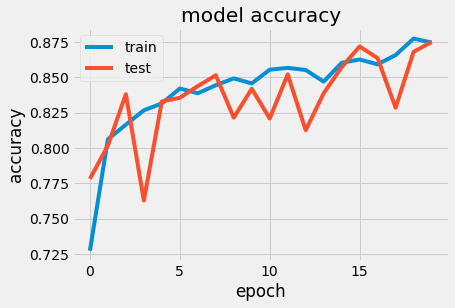

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

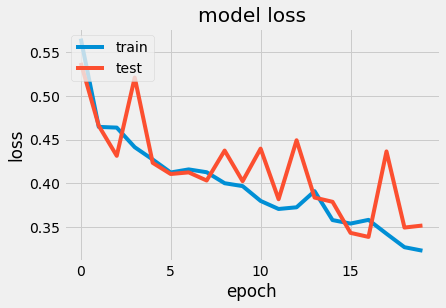

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/Test', batch_size = 16, class_mode='categorical', target_size=(250,250))

Found 1582 images belonging to 2 classes.


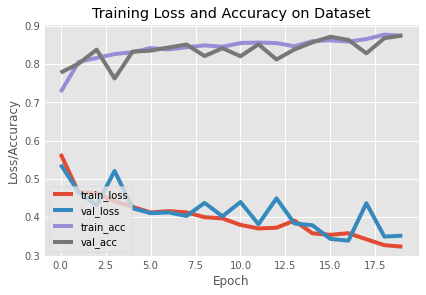

In [ ]:
import numpy as np
N=20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")


In [ ]:
scores = model.evaluate(test_generator)

99/99 [==============================] - 1739s 18s/step - loss: 2.2127 - accuracy: 0.5000


In [ ]:
predIdxs = model.predict(x=test_generator, steps=(98))

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
sensitivity

0.65

In [ ]:
specificity

0.56